In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import MiniBatchKMeans
from sklearn.preprocessing import OrdinalEncoder

In [2]:
train = pd.read_csv('datasets/Train.csv')
train.head()

,ward,total_households,total_individuals,target,dw_00,dw_01,dw_02,dw_03,dw_04,dw_05,...,pw_03,pw_04,pw_05,pw_06,pw_07,pw_08,ADM4_PCODE,lat,lon,NL
0,41601001: Ward 1,1674.45058,5888.20750,16.773757,0.933841,0.000846,0.005490,0.000676,0.000000,0.001372,...,0.002848,0.007537,0.000000,0.012928,0,0,ZA4161001,-29.682270,24.734743,0.292039
1,41601002: Ward 2,1736.99230,6735.33812,21.496661,0.696940,0.001253,0.004402,0.000000,0.002301,0.001323,...,0.014566,0.057127,0.019092,0.004131,0,0,ZA4161002,-29.119311,24.757737,3.207775
2,41601003: Ward 3,2403.57591,7273.04995,10.931425,0.810545,0.004517,0.008891,0.003986,0.007735,0.000956,...,0.057560,0.010358,0.001421,0.040881,0,0,ZA4161003,-29.142276,25.094093,0.000000
3,41601004: Ward 4,1740.78737,5734.49046,23.119257,0.659914,0.000000,0.006129,0.000000,0.000813,0.037245,...,0.000000,0.000669,0.000000,0.005011,0,0,ZA4161004,-29.372052,24.942867,2.038778
4,41601005: Ward 5,1730.51451,6657.23835,13.652252,0.950575,0.000655,0.001473,0.000598,0.006999,0.000818,...,0.004859,0.001290,0.000673,0.017629,0,0,ZA4161005,-29.409381,25.290165,0.000000


In [3]:
PATTERN = r'[\d\s]+:'

train['ward1'] = train['ward'].str.replace(PATTERN, '', regex=True)
train

,ward,total_households,total_individuals,target,dw_00,dw_01,dw_02,dw_03,dw_04,dw_05,...,pw_04,pw_05,pw_06,pw_07,pw_08,ADM4_PCODE,lat,lon,NL,ward1
0,41601001: Ward 1,1674.45058,5888.20750,16.773757,0.933841,0.000846,0.005490,0.000676,0.000000,0.001372,...,0.007537,0.000000,0.012928,0,0,ZA4161001,-29.682270,24.734743,0.292039,Ward 1
1,41601002: Ward 2,1736.99230,6735.33812,21.496661,0.696940,0.001253,0.004402,0.000000,0.002301,0.001323,...,0.057127,0.019092,0.004131,0,0,ZA4161002,-29.119311,24.757737,3.207775,Ward 2
2,41601003: Ward 3,2403.57591,7273.04995,10.931425,0.810545,0.004517,0.008891,0.003986,0.007735,0.000956,...,0.010358,0.001421,0.040881,0,0,ZA4161003,-29.142276,25.094093,0.000000,Ward 3
3,41601004: Ward 4,1740.78737,5734.49046,23.119257,0.659914,0.000000,0.006129,0.000000,0.000813,0.037245,...,0.000669,0.000000,0.005011,0,0,ZA4161004,-29.372052,24.942867,2.038778,Ward 4
4,41601005: Ward 5,1730.51451,6657.23835,13.652252,0.950575,0.000655,0.001473,0.000598,0.006999,0.000818,...,0.001290,0.000673,0.017629,0,0,ZA4161005,-29.409381,25.290165,0.000000,Ward 5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2817,34503001: Ward 1,3261.68067,11551.56486,6.393480,0.874972,0.003146,0.017230,0.004735,0.048888,0.000654,...,0.000472,0.000000,0.006203,0,0,ZA3453001,-27.675590,23.057920,9.118927,Ward 1
2818,34503002: Ward 2,1463.06432,7908.90411,15.668000,0.636235,0.002262,0.010433,0.000000,0.003030,0.000000,...,0.000713,0.000000,0.008414,0,0,ZA3453002,-27.591408,22.907161,1.697395,Ward 2
2819,34503003: Ward 3,1395.18881,6242.37527,13.238795,0.855975,0.006601,0.061118,0.000812,0.003912,0.000812,...,0.001458,0.000000,0.003670,0,0,ZA3453003,-27.952550,22.749698,2.792501,Ward 3
2820,34503004: Ward 4,1679.66964,8014.73089,17.639523,0.792552,0.004423,0.016099,0.000000,0.000674,0.000000,...,0.007870,0.000000,0.004803,0,0,ZA3453004,-27.913875,22.755314,2.793699,Ward 4


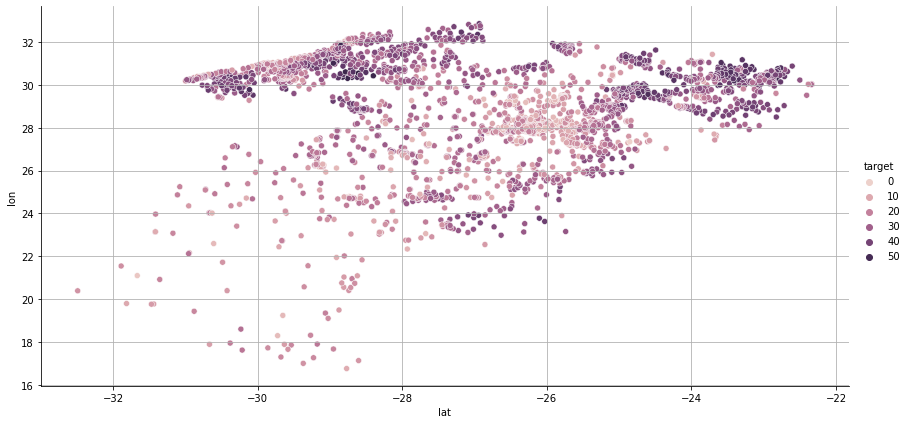

In [4]:
# plt.rc('Figure', autolayout = True)
# plt.rc('axes', labelweight = 'bold', labelsize = 'large', titleweight = 'bold', titlesize = 14, titlepad = 10)
sns.relplot(kind = 'scatter', x = 'lat', y = 'lon', hue = 'target', data = train, height = 6, aspect = 2)
plt.grid()
plt.show()

<AxesSubplot:>

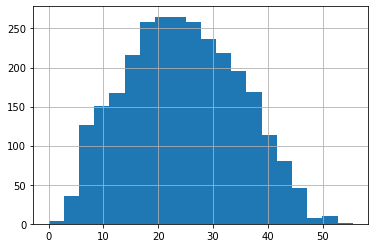

In [5]:
train['target'].hist(bins = 20)

In [6]:
categorical_cols = [cols for cols in train.columns if train[cols].dtype == 'object']

#Encode categorical columns.
encoder = OrdinalEncoder(handle_unknown = 'error')
train[categorical_cols] = encoder.fit_transform(train[categorical_cols])
train

,ward,total_households,total_individuals,target,dw_00,dw_01,dw_02,dw_03,dw_04,dw_05,...,pw_04,pw_05,pw_06,pw_07,pw_08,ADM4_PCODE,lat,lon,NL,ward1
0,176.0,1674.45058,5888.20750,16.773757,0.933841,0.000846,0.005490,0.000676,0.000000,0.001372,...,0.007537,0.000000,0.012928,0,0,176.0,-29.682270,24.734743,0.292039,0.0
1,177.0,1736.99230,6735.33812,21.496661,0.696940,0.001253,0.004402,0.000000,0.002301,0.001323,...,0.057127,0.019092,0.004131,0,0,177.0,-29.119311,24.757737,3.207775,42.0
2,178.0,2403.57591,7273.04995,10.931425,0.810545,0.004517,0.008891,0.003986,0.007735,0.000956,...,0.010358,0.001421,0.040881,0,0,178.0,-29.142276,25.094093,0.000000,53.0
3,179.0,1740.78737,5734.49046,23.119257,0.659914,0.000000,0.006129,0.000000,0.000813,0.037245,...,0.000669,0.000000,0.005011,0,0,179.0,-29.372052,24.942867,2.038778,64.0
4,180.0,1730.51451,6657.23835,13.652252,0.950575,0.000655,0.001473,0.000598,0.006999,0.000818,...,0.001290,0.000673,0.017629,0,0,180.0,-29.409381,25.290165,0.000000,75.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2817,171.0,3261.68067,11551.56486,6.393480,0.874972,0.003146,0.017230,0.004735,0.048888,0.000654,...,0.000472,0.000000,0.006203,0,0,171.0,-27.675590,23.057920,9.118927,0.0
2818,172.0,1463.06432,7908.90411,15.668000,0.636235,0.002262,0.010433,0.000000,0.003030,0.000000,...,0.000713,0.000000,0.008414,0,0,172.0,-27.591408,22.907161,1.697395,42.0
2819,173.0,1395.18881,6242.37527,13.238795,0.855975,0.006601,0.061118,0.000812,0.003912,0.000812,...,0.001458,0.000000,0.003670,0,0,173.0,-27.952550,22.749698,2.792501,53.0
2820,174.0,1679.66964,8014.73089,17.639523,0.792552,0.004423,0.016099,0.000000,0.000674,0.000000,...,0.007870,0.000000,0.004803,0,0,174.0,-27.913875,22.755314,2.793699,64.0


In [7]:
features = train.loc[:, ['total_households', 'total_individuals', 'ward1']]
kmeans = MiniBatchKMeans(n_clusters = 20, batch_size = 10, random_state = 42)
train['Cluster'] = kmeans.fit_predict(features)

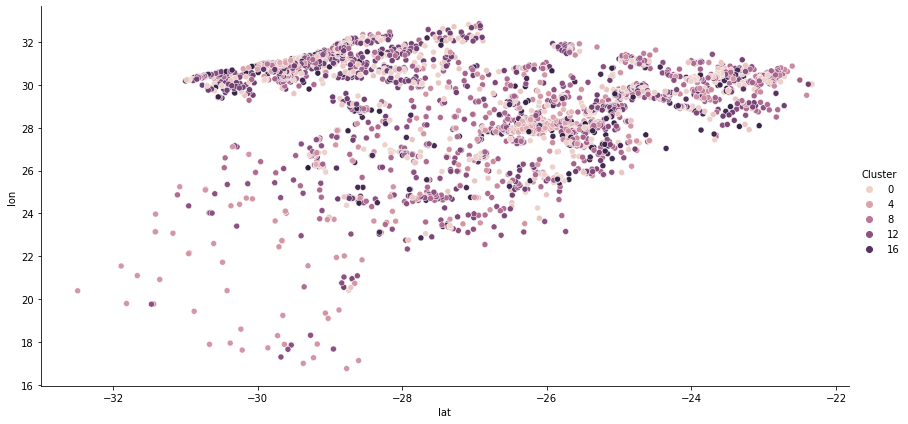

In [8]:
sns.relplot(kind = 'scatter', x = 'lat', y = 'lon', hue = 'Cluster', data = train, height = 6, aspect = 2)
plt.show()

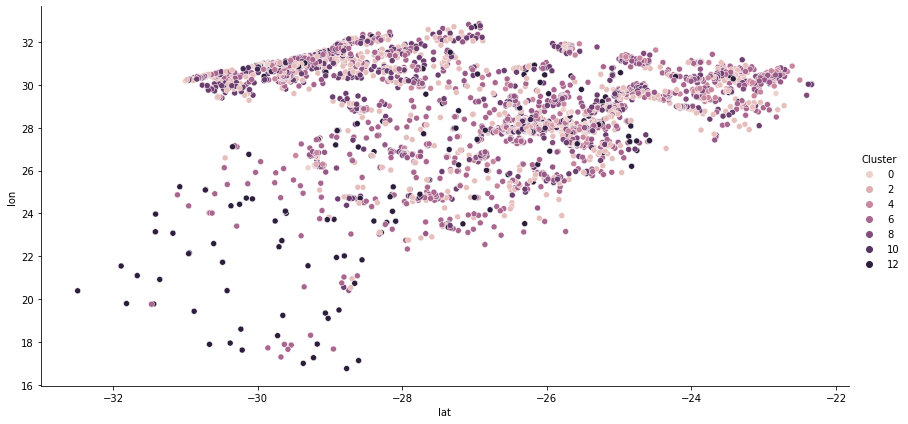

In [29]:
kmeans = MiniBatchKMeans(n_clusters = 13)
train['Cluster'] = kmeans.fit_predict(features)

sns.relplot(kind = 'scatter', x = 'lat', y = 'lon', hue = 'Cluster', data = train, height = 6, aspect = 2)
plt.show()

In [30]:
train['Cluster'].nunique()

13

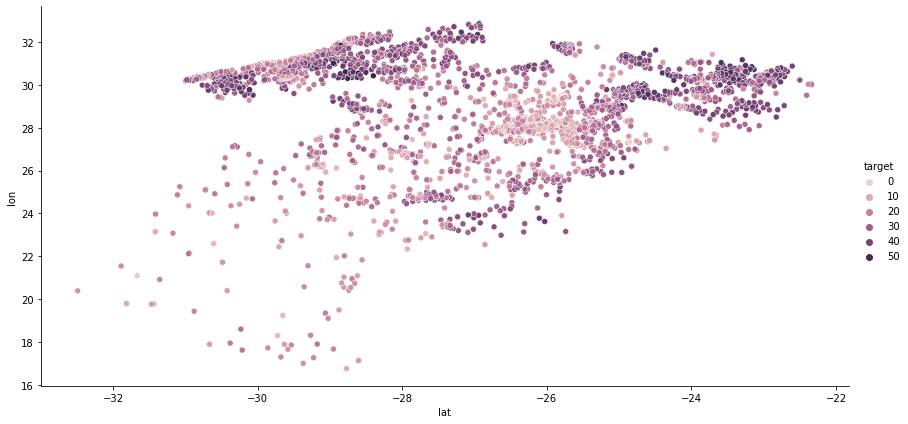

In [15]:
sns.relplot(kind = 'scatter', x = 'lat', y = 'lon', hue = 'target', data = train, height = 6, aspect = 2)
plt.show()

In [17]:
train['ward1'].nunique()

130